In [1]:
###Importing the packages###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
     

In [2]:
###All the datasets are accquired from Goofle, Microsoft, amazon and IBM

google = pd.read_csv('GOOGLE.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
microsoft = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()
     

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [4]:
amazon = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [5]:
ibm = pd.read_csv('IBM.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [6]:
#All datasets have same column names in the same order.
#Lets check for missing values and remove them. 

In [7]:
ibm.dropna(inplace=True)

In [8]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [9]:
#From checking all the missing values only IBM data set had it and it wont lead to any data loss since it was just a couple of values.

In [10]:
####Checking the mean, median and st.d for all the datasets#####

In [11]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,145.515545,146.682319,144.471597,145.617592,5.773770e+06
std,37.554946,37.619664,37.477641,37.535600,3.193255e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.750000,115.490000,116.520000,3.622178e+06
50%,149.610000,150.410000,148.470000,149.330000,4.931203e+06
75%,178.445000,179.775000,177.330000,178.690000,6.966642e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [12]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [13]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08


In [14]:
amazon.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


The sample size in all datasets are same.

Google has the highest average stock price among all the organizations and microsoft has the lowest.

Amazon appears to have the highest volatility andmicrosoft has the lowest. The standard deviation indicates the price flunctuations.

Therefore, amazon has a varitey and the widest range of stock prices and microsoft has the lowest.

Although microst has the highest trading volume on average which might indicate higher liquidirt and interest among all of them.

Lets step into Explonatory data analysis (EDA) to visualize our data.

In [15]:
######################EDA############################

In [16]:
def information(df, company_name):
    print(f"\n--------- EDA for {company_name} ---------\n")
    
    print(df.info())
    print(df.describe())    

In [17]:
information(microsoft, "Microsoft")
information(amazon, "Amazon")
information(google, "Google")


--------- EDA for Microsoft ---------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB
None
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     36.496817    36.827903    36.173190    36.513412  5.161762e+07
std      14.683337    14.742483    14.620057    14.694656  3.114958e+07
min      15.200000    15.620000    14.870000    15.150000  7.425603e+06
25%      26.785000    27.045000    26.535000    26.835000  3.136557e+07
50%      29.990000    30.230000    29.7

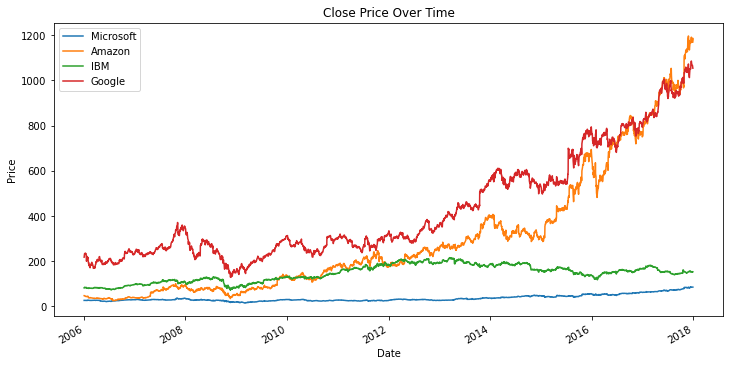

In [18]:
#Plotting closing price over time

plt.figure(figsize=(12,6))
microsoft['Close'].plot(label='Microsoft')
amazon['Close'].plot(label='Amazon')
ibm['Close'].plot(label='IBM')
google['Close'].plot(label='Google')
plt.title('Close Price Over Time')
plt.ylabel('Price')
plt.legend()
plt.show()


From the plot it is evident, hat Microsoft's "High" stock price shows a gradual, consistent increase. Initially, IBM's and Amazon's "High" stock values were roughly at the same level, with Amazon's even slightly trailing IBM's. However, post-2012, Amazon's "High" stock value began an exponential surge, while IBM's witnessed a moderate decline.

By 2016, there was notable competition between Google's "High" stock price and Amazon's. By 2018, Amazon even managed to surpass Google's "High" stock value.

We will display the cumulative variability (growing standard deviation) and cumulative average (expanding mean) of the company's stock together with their 'High' prices over time. It determines the average and standard deviation of the 'High' prices from the beginning of the dataset to each particular time point using the expanding() method from pandas. This can be plotted to analyze the stock's price trend, typical behavior, and variability.The resulting visualization shows how the stock price, the dataset's overall mean, and its standard deviation change over time.

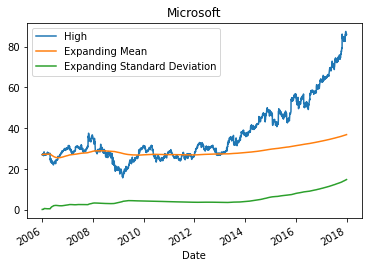

In [19]:
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft')
plt.show()

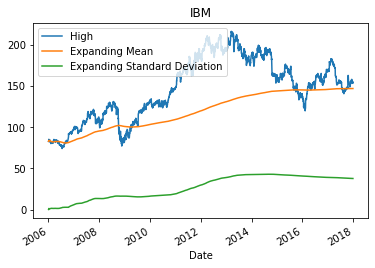

In [20]:
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()

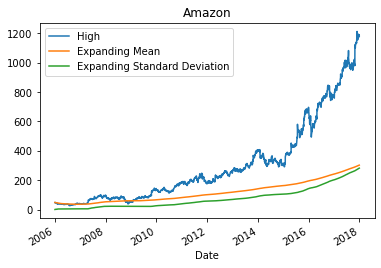

In [21]:
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

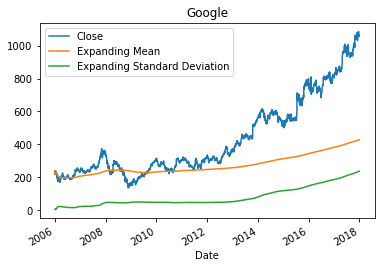

In [22]:
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [23]:
#Using the seasonal_decompose method from the statsmodels package, we will perform a seasonal decomposition on Google's stock "High" prices.
#It assumes a recurrent seasonal pattern roughly comparable to annual business days by setting the period to 360. The data are divided into three primary categories by the decomposition: trend, seasonality, and residuals.
#The original data, the underlying trend, the seasonal fluctuations, and the residual errors are then depicted by the code in four subplots. Using the rcParams option, the default figure size for this visualization is set to 11 inches in width and 9 inches in height.

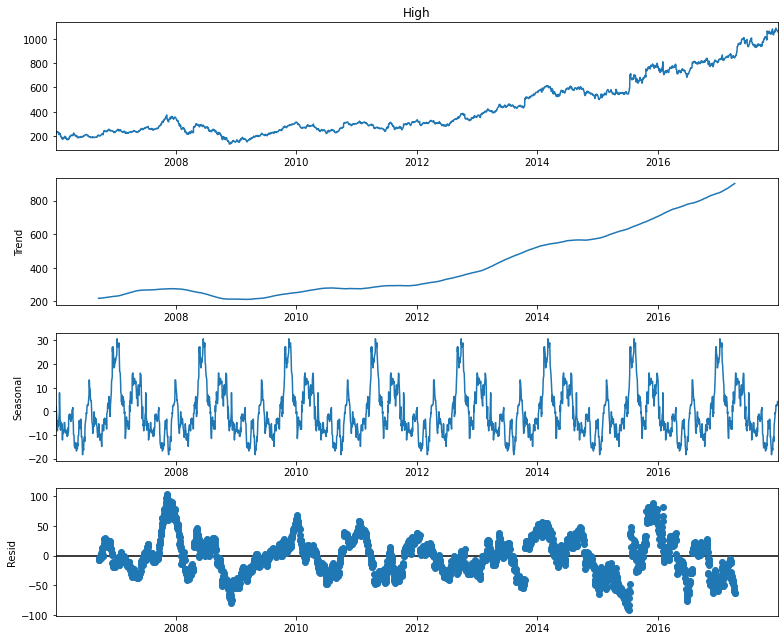

In [24]:
#Google
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360) 
figure = decomposed_google_volume.plot()
plt.show()

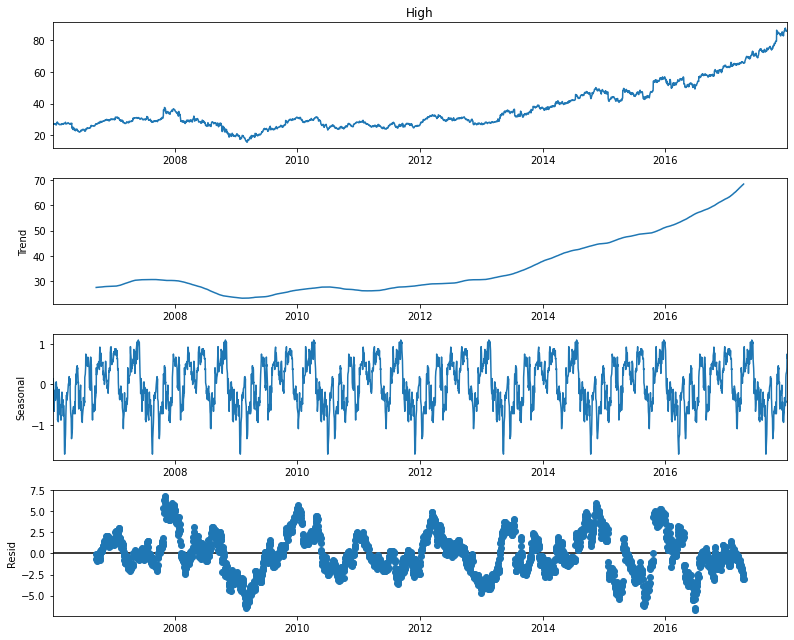

In [25]:
#Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"],period=360) 
figure = decomposed_microsoft_volume.plot()
plt.show()
     

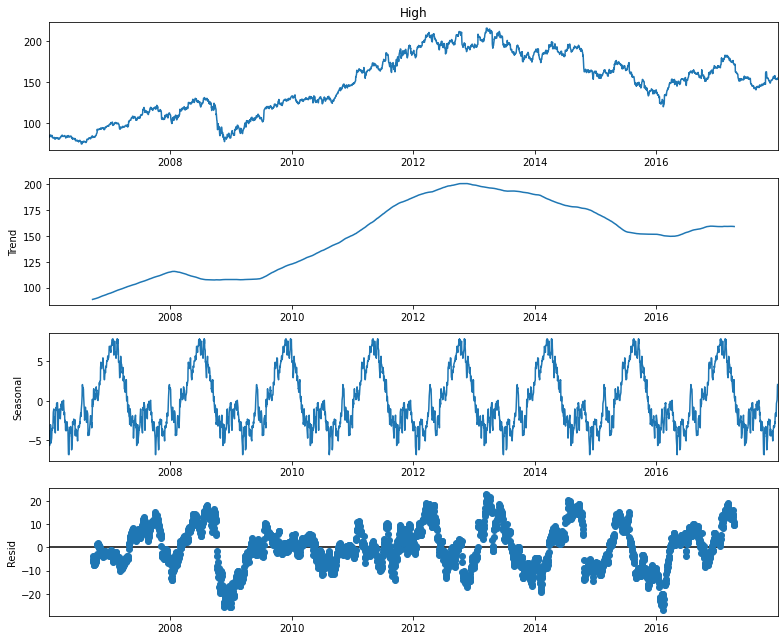

In [26]:
#Ibm

rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) 
figure = decomposed_ibm_volume.plot()
plt.show()

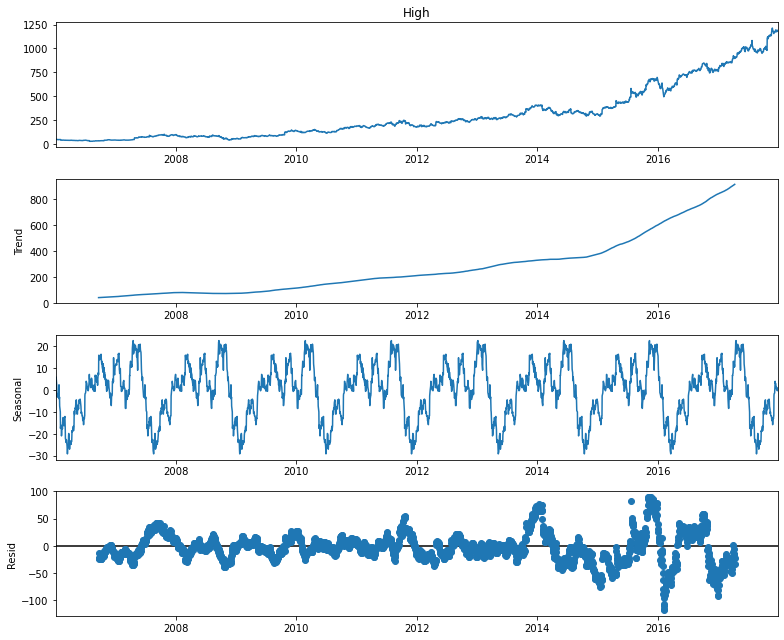

In [27]:
#Amazon'

rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360)
figure = decomposed_amazon_volume.plot()
plt.show()

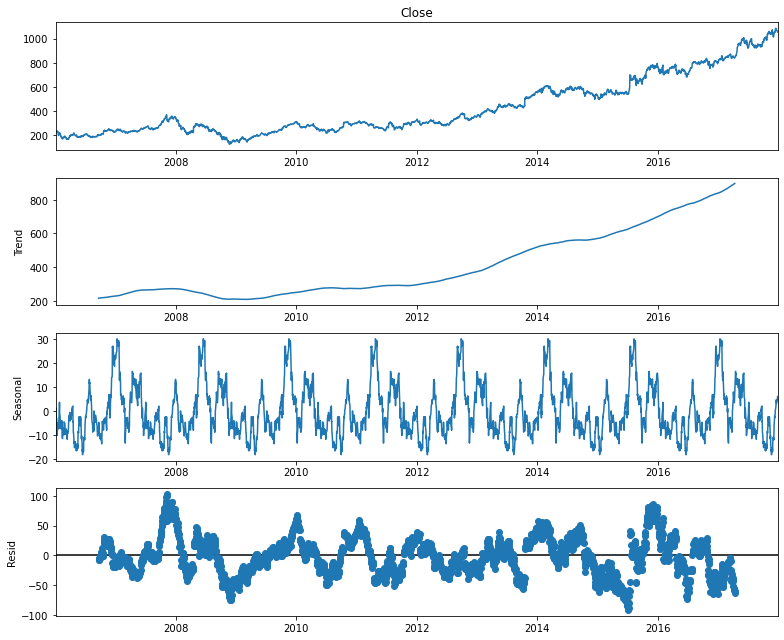

In [28]:
##############closing#############

#Google

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"],period=360)
figure = decomposed_google_volume.plot()
plt.show()

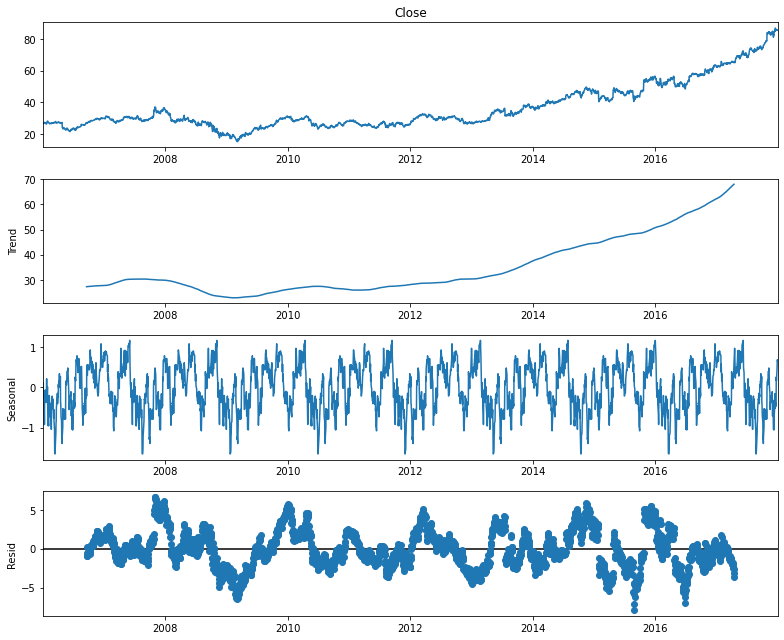

In [29]:
#microsoft
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"], period=360) 
figure = decomposed_microsoft_volume.plot()
plt.show()

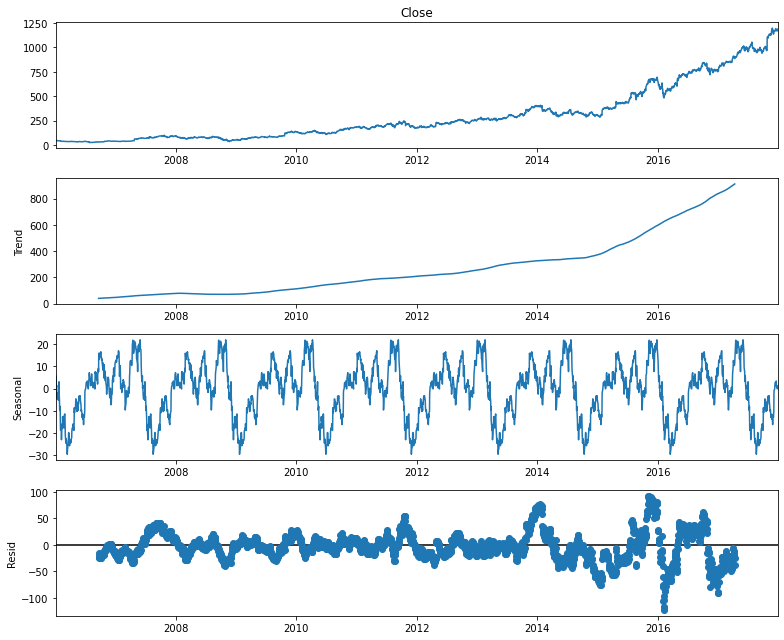

In [30]:
#amazon

rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"],period=360) 
figure = decomposed_amazon_volume.plot()
plt.show()
     

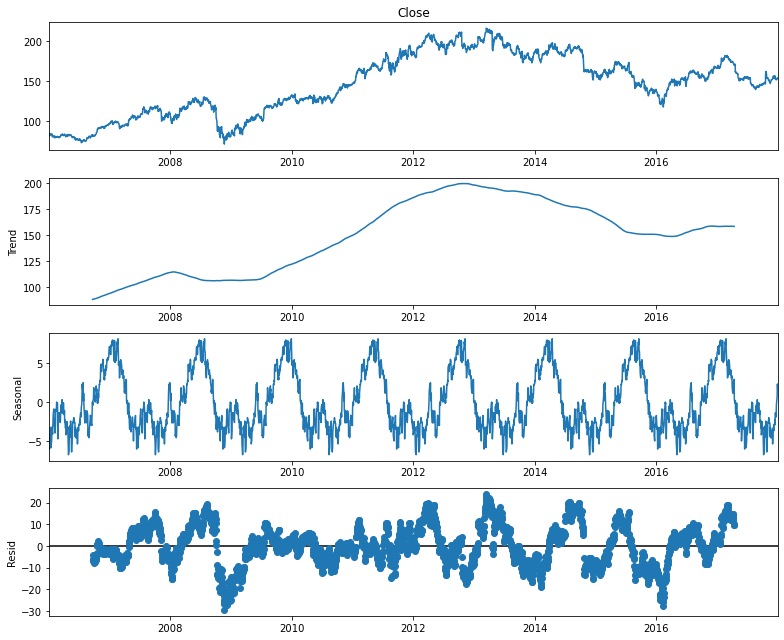

In [31]:
#ibm
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"],period=360)
figure = decomposed_ibm_volume.plot()
plt.show()

In [32]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [33]:
###############Building our model###############

In [34]:
def forecast_lstm(company_name, data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(data.reshape(-1, 1))

    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

   
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

   
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    trainScore = np.sqrt(np.mean((trainPredict-trainY)**2))
    print(f'Train Score for {company_name}: {trainScore:.2f} RMSE')
    testScore = np.sqrt(np.mean((testPredict-testY)**2))
    print(f'Test Score for {company_name}: {testScore:.2f} RMSE')


    plt.figure(figsize=(12,6))
    plt.plot(scaler.inverse_transform(dataset))
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    plt.plot(trainPredictPlot, label='Train Prediction')
    plt.plot(testPredictPlot, label='Test Prediction')
    plt.title(f'{company_name} Stock Price Forecast')
    plt.legend()
    plt.show()

Predictions for microsoft.

The blue line (original stock price) shows how the stock price evolved over time.

The orange and green lines show the model's predictions on the training and testing data, respectively.


Epoch 1/100
2018/2018 - 6s - loss: 4.8396e-04 - 6s/epoch - 3ms/step
Epoch 2/100
2018/2018 - 3s - loss: 7.3289e-05 - 3s/epoch - 2ms/step
Epoch 3/100
2018/2018 - 3s - loss: 7.0775e-05 - 3s/epoch - 2ms/step
Epoch 4/100
2018/2018 - 3s - loss: 6.6026e-05 - 3s/epoch - 2ms/step
Epoch 5/100
2018/2018 - 3s - loss: 6.5858e-05 - 3s/epoch - 1ms/step
Epoch 6/100
2018/2018 - 3s - loss: 5.8428e-05 - 3s/epoch - 2ms/step
Epoch 7/100
2018/2018 - 3s - loss: 5.5398e-05 - 3s/epoch - 2ms/step
Epoch 8/100
2018/2018 - 3s - loss: 5.5068e-05 - 3s/epoch - 2ms/step
Epoch 9/100
2018/2018 - 3s - loss: 5.5629e-05 - 3s/epoch - 2ms/step
Epoch 10/100
2018/2018 - 4s - loss: 5.5832e-05 - 4s/epoch - 2ms/step
Epoch 11/100
2018/2018 - 3s - loss: 5.5469e-05 - 3s/epoch - 2ms/step
Epoch 12/100
2018/2018 - 3s - loss: 5.2385e-05 - 3s/epoch - 2ms/step
Epoch 13/100
2018/2018 - 3s - loss: 5.1357e-05 - 3s/epoch - 2ms/step
Epoch 14/100
2018/2018 - 3s - loss: 5.2340e-05 - 3s/epoch - 2ms/step
Epoch 15/100
2018/2018 - 3s - loss: 5.2177e

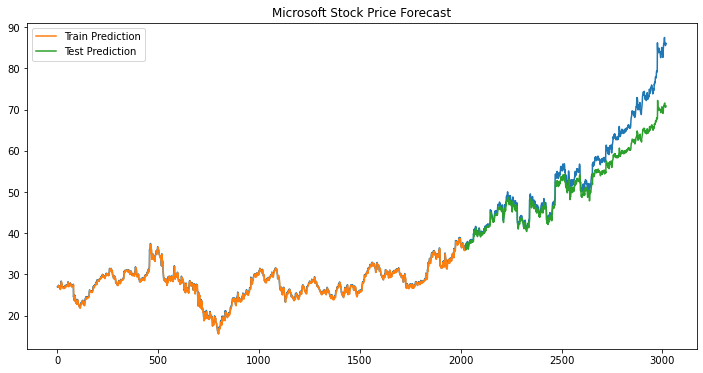

In [36]:
forecast_lstm('Microsoft', microsoft['High'].values)

Epoch 1/100
2018/2018 - 7s - loss: 3.4404e-04 - 7s/epoch - 3ms/step
Epoch 2/100
2018/2018 - 4s - loss: 1.8980e-05 - 4s/epoch - 2ms/step
Epoch 3/100
2018/2018 - 4s - loss: 1.9415e-05 - 4s/epoch - 2ms/step
Epoch 4/100
2018/2018 - 4s - loss: 1.8616e-05 - 4s/epoch - 2ms/step
Epoch 5/100
2018/2018 - 4s - loss: 1.7612e-05 - 4s/epoch - 2ms/step
Epoch 6/100
2018/2018 - 6s - loss: 1.7175e-05 - 6s/epoch - 3ms/step
Epoch 7/100
2018/2018 - 5s - loss: 1.6997e-05 - 5s/epoch - 2ms/step
Epoch 8/100
2018/2018 - 5s - loss: 1.7139e-05 - 5s/epoch - 3ms/step
Epoch 9/100
2018/2018 - 5s - loss: 1.5889e-05 - 5s/epoch - 2ms/step
Epoch 10/100
2018/2018 - 4s - loss: 1.6476e-05 - 4s/epoch - 2ms/step
Epoch 11/100
2018/2018 - 5s - loss: 1.5978e-05 - 5s/epoch - 2ms/step
Epoch 12/100
2018/2018 - 4s - loss: 1.5338e-05 - 4s/epoch - 2ms/step
Epoch 13/100
2018/2018 - 5s - loss: 1.5012e-05 - 5s/epoch - 2ms/step
Epoch 14/100
2018/2018 - 5s - loss: 1.5282e-05 - 5s/epoch - 3ms/step
Epoch 15/100
2018/2018 - 4s - loss: 1.4291e

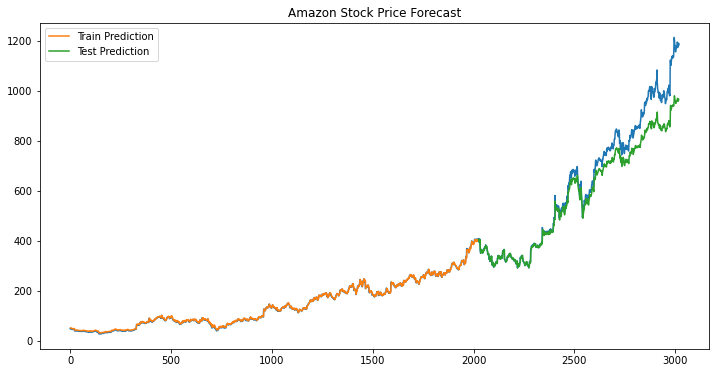

In [37]:
forecast_lstm('Amazon', amazon['High'].values)

Epoch 1/100
2018/2018 - 8s - loss: 0.0065 - 8s/epoch - 4ms/step
Epoch 2/100
2018/2018 - 4s - loss: 3.1659e-04 - 4s/epoch - 2ms/step
Epoch 3/100
2018/2018 - 5s - loss: 3.0242e-04 - 5s/epoch - 2ms/step
Epoch 4/100
2018/2018 - 5s - loss: 2.8815e-04 - 5s/epoch - 2ms/step
Epoch 5/100
2018/2018 - 5s - loss: 2.7030e-04 - 5s/epoch - 2ms/step
Epoch 6/100
2018/2018 - 5s - loss: 2.5522e-04 - 5s/epoch - 3ms/step
Epoch 7/100
2018/2018 - 5s - loss: 2.6503e-04 - 5s/epoch - 2ms/step
Epoch 8/100
2018/2018 - 4s - loss: 2.4509e-04 - 4s/epoch - 2ms/step
Epoch 9/100
2018/2018 - 4s - loss: 2.4169e-04 - 4s/epoch - 2ms/step
Epoch 10/100
2018/2018 - 4s - loss: 2.3050e-04 - 4s/epoch - 2ms/step
Epoch 11/100
2018/2018 - 4s - loss: 2.3428e-04 - 4s/epoch - 2ms/step
Epoch 12/100
2018/2018 - 3s - loss: 2.1724e-04 - 3s/epoch - 2ms/step
Epoch 13/100
2018/2018 - 3s - loss: 2.2012e-04 - 3s/epoch - 2ms/step
Epoch 14/100
2018/2018 - 3s - loss: 2.1440e-04 - 3s/epoch - 2ms/step
Epoch 15/100
2018/2018 - 3s - loss: 2.0962e-04 

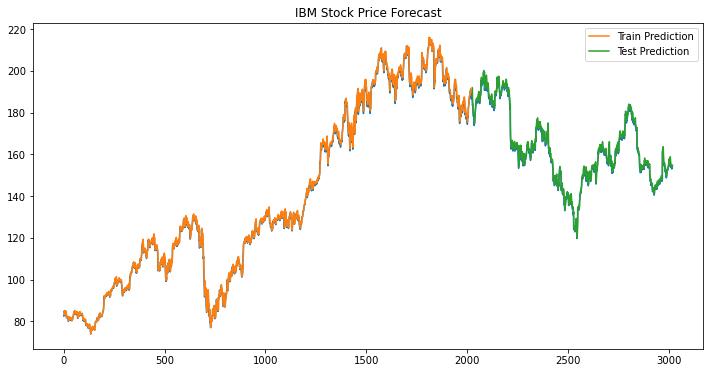

In [38]:
forecast_lstm('IBM', ibm['High'].values)

Epoch 1/100
2018/2018 - 7s - loss: 8.5769e-04 - 7s/epoch - 4ms/step
Epoch 2/100
2018/2018 - 4s - loss: 5.2570e-05 - 4s/epoch - 2ms/step
Epoch 3/100
2018/2018 - 4s - loss: 5.2772e-05 - 4s/epoch - 2ms/step
Epoch 4/100
2018/2018 - 4s - loss: 4.9893e-05 - 4s/epoch - 2ms/step
Epoch 5/100
2018/2018 - 3s - loss: 4.9865e-05 - 3s/epoch - 2ms/step
Epoch 6/100
2018/2018 - 4s - loss: 4.7164e-05 - 4s/epoch - 2ms/step
Epoch 7/100
2018/2018 - 3s - loss: 4.3311e-05 - 3s/epoch - 2ms/step
Epoch 8/100
2018/2018 - 3s - loss: 4.0783e-05 - 3s/epoch - 1ms/step
Epoch 9/100
2018/2018 - 4s - loss: 4.1642e-05 - 4s/epoch - 2ms/step
Epoch 10/100
2018/2018 - 4s - loss: 4.1858e-05 - 4s/epoch - 2ms/step
Epoch 11/100
2018/2018 - 3s - loss: 4.0403e-05 - 3s/epoch - 2ms/step
Epoch 12/100
2018/2018 - 3s - loss: 3.9357e-05 - 3s/epoch - 2ms/step
Epoch 13/100
2018/2018 - 4s - loss: 3.9217e-05 - 4s/epoch - 2ms/step
Epoch 14/100
2018/2018 - 4s - loss: 3.7236e-05 - 4s/epoch - 2ms/step
Epoch 15/100
2018/2018 - 4s - loss: 3.8074e

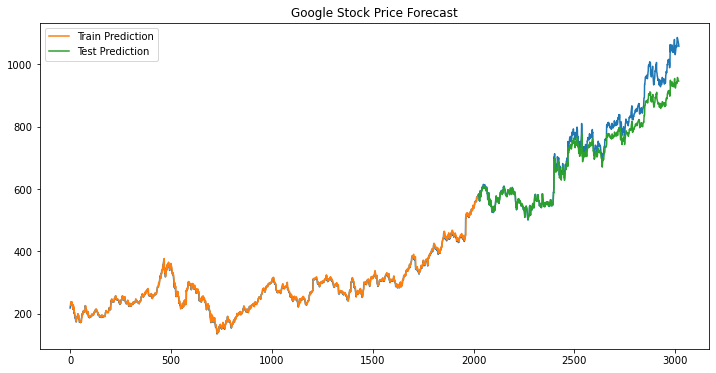

In [39]:
forecast_lstm('Google', google['High'].values)